In [2]:
import json
from pathlib import Path

import lightning.pytorch as L
import torch
from lightning.pytorch.callbacks import Callback, ModelCheckpoint
from matplotlib import pyplot as plt
from torchmetrics.classification import MulticlassAccuracy

from sainomore.callbacks import (ElissabethISTracker, ElissabethWeighting,
                                 GeneralConfigCallback, WeightHistory)
from sainomore.data import GivenDataModule, long_lookup
from sainomore.elissabeth import Elissabeth, Weighting
from sainomore.lightning import TokenPredictionModule
from sainomore.xai import get_attention_matrices, plot_attention_matrix
from sainomore.xai import ElissabethWatcher

In [6]:
config = {
    "n_samples": 1000,
    "context_length": 100,
    "characters": 5,

    "lr": 5e-3,
    "weight_decay": 1e-4,
    "epochs": 10001,

    "batch_size": 64,
    "val_size": 0.2,
}


with open("config.json", "r") as f:
    model_config = json.load(f)

model_config["context_length"] = config["context_length"]
model_config["input_vocab_size"] = config["characters"]

model = Elissabeth.build(
    model_config,
    Weighting.MSC,
    Weighting.ExponentialDecay,
)

lightning_module = TokenPredictionModule(
    model,
    learning_rate=config["lr"],
    weight_decay=config["weight_decay"],
    loss=torch.nn.CrossEntropyLoss(ignore_index=-1),
    accuracy=MulticlassAccuracy(config["characters"], ignore_index=-1),
    only_last=False,
)

In [7]:
watcher = ElissabethWatcher.load(model, "5m8ixods", on_cpu=True)

In [11]:
x, y = long_lookup(
    n_samples=1,
    length=config["context_length"],
    characters=config["characters"],
    multiple_keys=False,
)

In [12]:
print(x, "\n", y)

tensor([[2, 4, 4, 2, 1, 4, 3, 2, 2, 3, 1, 2, 3, 2, 4, 1, 2, 3, 1, 3, 4, 4, 2, 1,
         1, 4, 2, 1, 4, 1, 4, 4, 2, 1, 1, 3, 4, 4, 4, 4, 1, 1, 3, 2, 4, 3, 4, 4,
         1, 3, 3, 4, 4, 4, 2, 2, 2, 3, 3, 1, 4, 2, 3, 2, 4, 3, 3, 0, 1, 3, 3, 3,
         4, 3, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 4, 1, 3, 4, 4, 3, 2, 2, 2, 4, 1, 1,
         2, 4, 2, 0]]) 
 tensor([[4, 4, 2, 1, 4, 3, 2, 2, 3, 1, 2, 3, 2, 4, 1, 2, 3, 1, 3, 4, 4, 2, 1, 1,
         4, 2, 1, 4, 1, 4, 4, 2, 1, 1, 3, 4, 4, 4, 4, 1, 1, 3, 2, 4, 3, 4, 4, 1,
         3, 3, 4, 4, 4, 2, 2, 2, 3, 3, 1, 4, 2, 3, 2, 4, 3, 3, 0, 1, 3, 3, 3, 4,
         3, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 4, 1, 3, 4, 4, 3, 2, 2, 2, 4, 1, 1, 2,
         4, 2, 0, 3]])


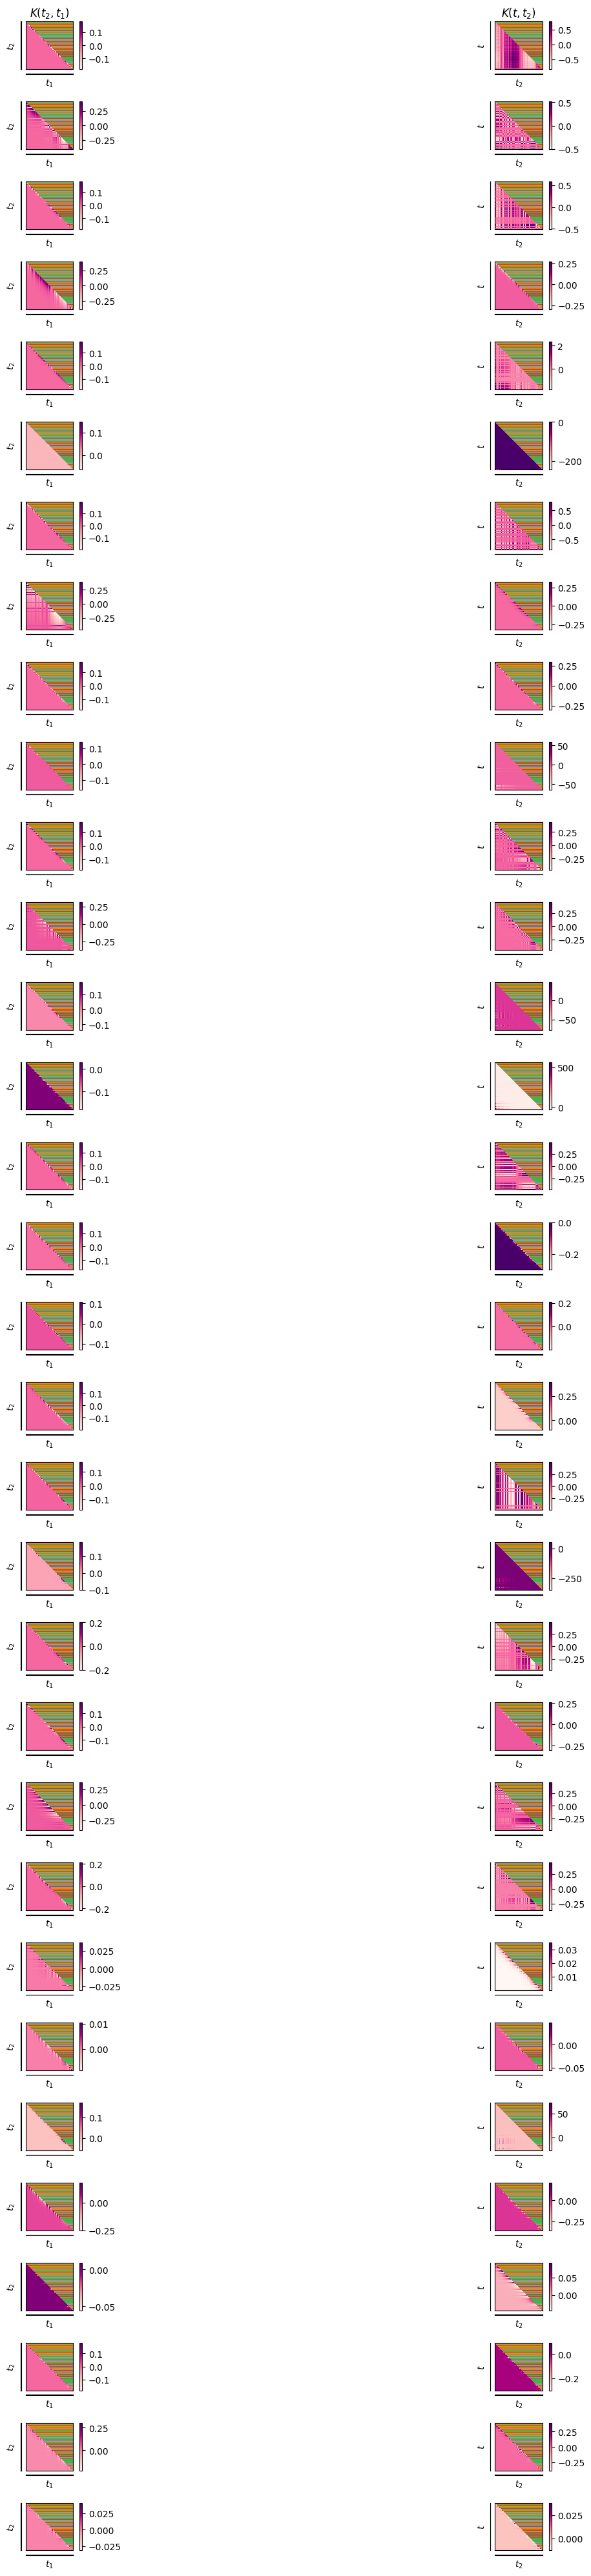

In [18]:
fig, ax = watcher.plot_attention_matrices(
    x[0],
    # total=True,
    cmap="RdPu",
    share_cmap=False,
    log_cmap=False,
    causal_mask=True,
    figsize=(20, 40),
)

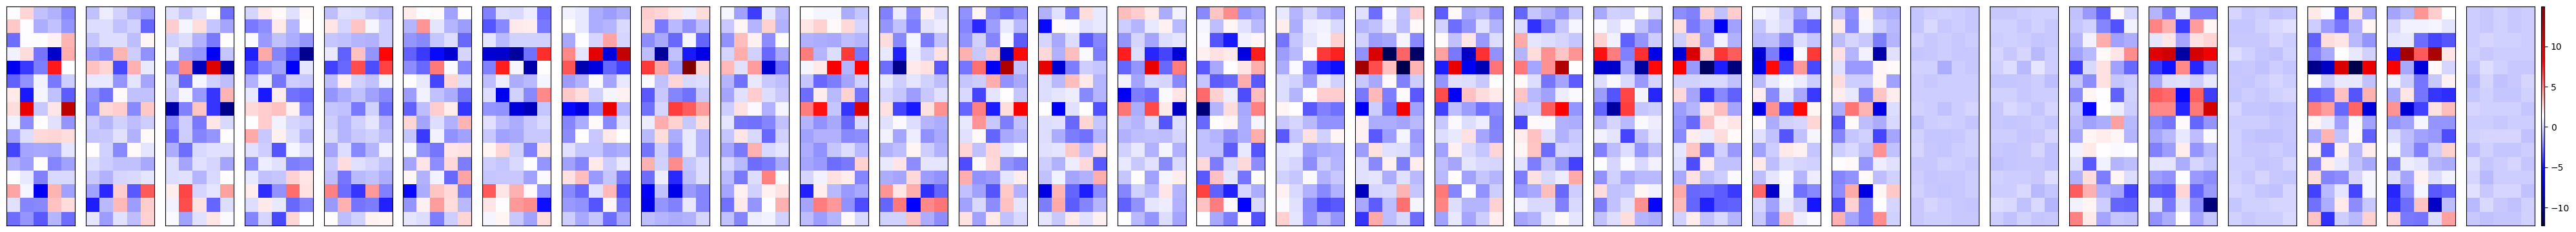

In [16]:
fig, ax = watcher.plot_parameter_matrix(
    "layers.0.W_O",
    reduce_dims={4: 0},
    figsize=(40, 50),
)

In [17]:
fig, ax = watcher.plot_qkv_probing(
    which="q",
    layer=0,
    length=0,
    weighting=0,
    figsize=(20, 5),
)

display.shape=torch.Size([100])
display.shape=torch.Size([100])
display.shape=torch.Size([100])
display.shape=torch.Size([100])
display.shape=torch.Size([100])
display.shape=torch.Size([100])
display.shape=torch.Size([100])
display.shape=torch.Size([100])
display.shape=torch.Size([100])
display.shape=torch.Size([100])
display.shape=torch.Size([100])
display.shape=torch.Size([100])
display.shape=torch.Size([100])
display.shape=torch.Size([100])
display.shape=torch.Size([100])
display.shape=torch.Size([100])
display.shape=torch.Size([100])
display.shape=torch.Size([100])
display.shape=torch.Size([100])
display.shape=torch.Size([100])
display.shape=torch.Size([100])
display.shape=torch.Size([100])
display.shape=torch.Size([100])
display.shape=torch.Size([100])
display.shape=torch.Size([100])
display.shape=torch.Size([100])
display.shape=torch.Size([100])
display.shape=torch.Size([100])
display.shape=torch.Size([100])
display.shape=torch.Size([100])
display.shape=torch.Size([100])
display.

KeyboardInterrupt: 

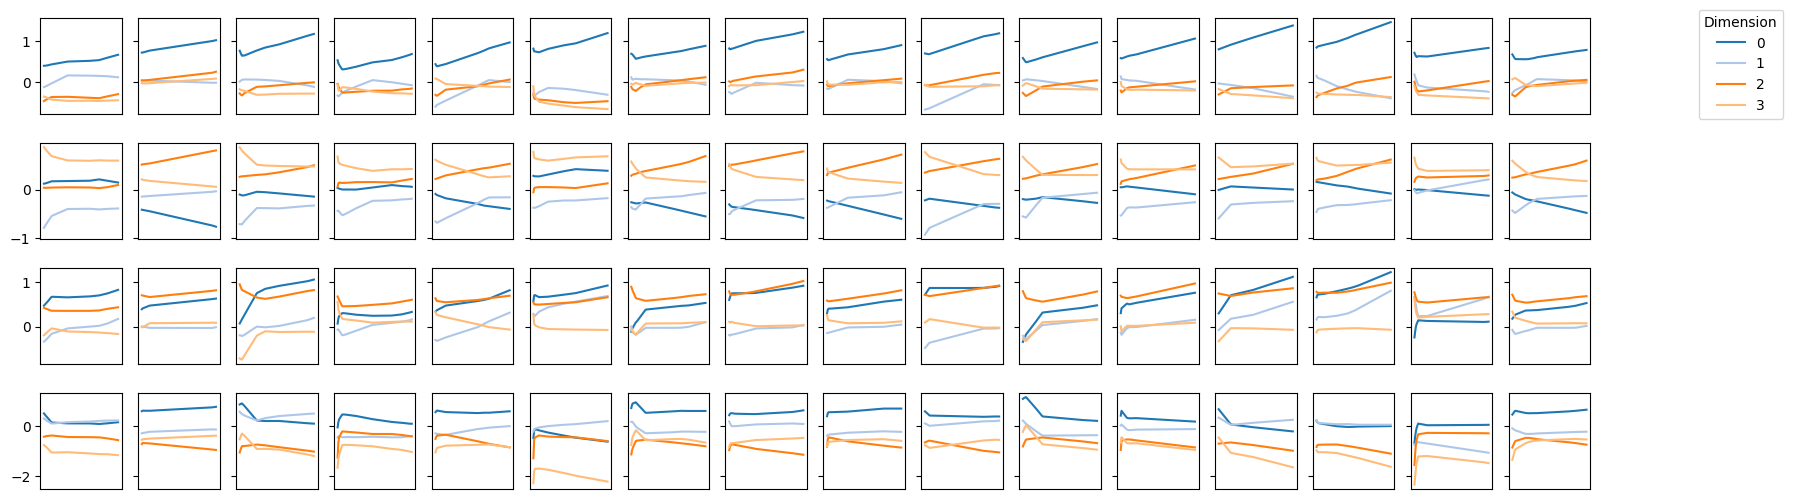

In [30]:
fig, ax = watcher.plot_qkv_probing(
    which="k",
    layer=0,
    length=0,
    weighting=0,
    figsize=(20, 5),
)